# 서포트 벡터 머신 실습

### 패키지 import 및 데이터 load

In [1]:
from sklearn import datasets

In [2]:
data = datasets.load_breast_cancer()

데이터 셋의 형태를 파악하기 위해 데이터를 출력해본다. 데이터셋의 형태는 딕셔너리 형태로, key가 data와 target으로 구분되어있다. 친절하게 scikit-learn에서는 데이터를 미리 전처리해두어서 data(X, 독립변수), target(Y, 종속변수)로 구분지어놨다.

In [3]:
print(data)

{'data': array([[  1.79900000e+01,   1.03800000e+01,   1.22800000e+02, ...,
          2.65400000e-01,   4.60100000e-01,   1.18900000e-01],
       [  2.05700000e+01,   1.77700000e+01,   1.32900000e+02, ...,
          1.86000000e-01,   2.75000000e-01,   8.90200000e-02],
       [  1.96900000e+01,   2.12500000e+01,   1.30000000e+02, ...,
          2.43000000e-01,   3.61300000e-01,   8.75800000e-02],
       ..., 
       [  1.66000000e+01,   2.80800000e+01,   1.08300000e+02, ...,
          1.41800000e-01,   2.21800000e-01,   7.82000000e-02],
       [  2.06000000e+01,   2.93300000e+01,   1.40100000e+02, ...,
          2.65000000e-01,   4.08700000e-01,   1.24000000e-01],
       [  7.76000000e+00,   2.45400000e+01,   4.79200000e+01, ...,
          0.00000000e+00,   2.87100000e-01,   7.03900000e-02]]), 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 

입력받은 데이터를 X,Y로 구분하여 처리한다. x 데이터의 형태를 확인하기 위해 아래와 같이 진행한다

In [4]:
x = data['data']
y = data['target']
print(x.shape)

(569, 30)


### 데이터 분할

데이터 분할은 scikit-learn에서 제공하는 train_test_split을 이용하면 편리하다. 아래와 같이 split을 하게되면 하나의 데이터로 부터 특정 비율만큼을 트레이닝셋으로, 나머지를 테스트셋으로 구분하여 활용할 수 있다.

 - train_test_split 메소드를 이용하여 데이터 셋을 구분한후, 데이터가 잘 나눠졌는지 shape를 확인 해보세요(test 셋의 비율은 30%로하세요)

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, Y_train, Y_test = train_test_split(x,y, test_size= 0.3, random_state=0)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((398, 30), (171, 30), (398,), (171,))

### Training Model

In [22]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn import svm

우선 가장 간단한 linear kernel을 이용하여 SVC를 실행해본다.

In [14]:
# 위의 import 된 클래스를 이용하여 객체를 생성하고 fitting 하세요
svm = svm.SVC(kernel= "linear")
svm.fit(X_train,Y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

해당 모델의 정확도를 확인한다. 해당 데이터는 linear 커널만으로도 충분히 좋은 테스트 정확도를 보인다

In [15]:
from sklearn import metrics
# predict 함수를 이용하세요
Y_pred = svm.predict(X_test)
print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred))

Accuracy: 0.631578947368


커널의 형태를 바꿔보자. 커널은 polynomial, rbf, sigmoid 가 있다.

 - svc 객체를 생성하고, fit & predict를 통해서 최종 accuracy를 확인하세요
 - 주의 !) poly의 경우 degree가 크면 속도가 오래걸리므로 degree=2로 옵션지정을 하세요

In [ ]:
kernels = ['poly','rbf','sigmoid']

In [ ]:
for kernel in kernels:
    # object 생성 및 fitting
    svm = svm.SVC(kernel= kernel, degree=2)
    svm.fit(X_train, Y_train)
    Y_pred = svm.predit(X_test)
    print("kernel : {}, Accuracy:".format(kernel), metrics.accuracy_score(Y_test, Y_pred))
    print("======================================")

커널이 rbf일때, C와 gamma에 따른 정확도의 차이를 확인해보자.

In [10]:
C = [0.1, 1, 10, 100]
Gamma = [0.1,1, 10, 100]

In [11]:
for c in C:
    for gamma in Gamma:
        # object 생성 및 fitting
        svm = svm.SVC(kernel='linear',C= c, gamma=gamma)  #linear일때는 gamma는 의미가 없어짐
        svm.fit(X_train, Y_train)
        Y_pred = svm.predit(X_test)
        print("C={} & Gamma={}, Accuracy:".format(c,gamma), metrics.accuracy_score(Y_test, Y_pred))
        print("======================================")

C=0.1 & Gamma=0.1, Accuracy: 0.631578947368421
C=0.1 & Gamma=1, Accuracy: 0.631578947368421
C=0.1 & Gamma=10, Accuracy: 0.631578947368421
C=0.1 & Gamma=100, Accuracy: 0.631578947368421
C=1 & Gamma=0.1, Accuracy: 0.631578947368421
C=1 & Gamma=1, Accuracy: 0.631578947368421
C=1 & Gamma=10, Accuracy: 0.631578947368421
C=1 & Gamma=100, Accuracy: 0.631578947368421
C=10 & Gamma=0.1, Accuracy: 0.631578947368421
C=10 & Gamma=1, Accuracy: 0.631578947368421
C=10 & Gamma=10, Accuracy: 0.631578947368421
C=10 & Gamma=100, Accuracy: 0.631578947368421
C=100 & Gamma=0.1, Accuracy: 0.631578947368421
C=100 & Gamma=1, Accuracy: 0.631578947368421
C=100 & Gamma=10, Accuracy: 0.631578947368421
C=100 & Gamma=100, Accuracy: 0.631578947368421


## 추가 예제 : Face Recognition

서포트 벡터 머신은 패턴인식 등에도 많이 활용되고 있으며, 많이 활용되는 분야 중 하나가 얼굴 인식 분야이다. 이에 대한 예제를 살펴보려한다.
아래의 예제 코드는 https://jakevdp.github.io/PythonDataScienceHandbook/05.07-support-vector-machines.html 를 참고하였다.

우선, 얼굴 인식을 위한 데이터셋을 scikit-learn 에서 제공하고 있다. 이는 fetch_lfw_people 데이터를 이용하면 된다.(단, 다운로드하는데 시간이 꽤 소요된다.)

In [12]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(faces.images.shape)

E:\SW\anaconda3\lib\site-packages\scipy\misc\pilutil.py:482: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if issubdtype(ts, int):
E:\SW\anaconda3\lib\site-packages\scipy\misc\pilutil.py:485: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif issubdtype(type(size), float):


['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


각각의 데이터가 어떻게 생겼는지 확인해보기 위해, 아래와 같이 그림을 출력해보자.

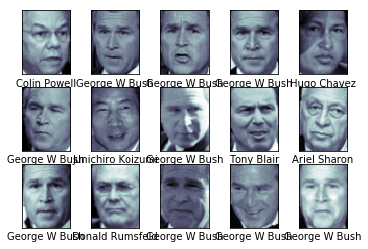

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline
fig, ax = plt.subplots(3, 5)
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='bone')
    axi.set(xticks=[], yticks=[],
            xlabel=faces.target_names[faces.target[i]])

SVC를 적용하기 위해, PCA를 이용하여 기존의 이미지 데이터를 전처리하여 차원축소를 진행한다. 기존의 이미지는 [62×47]의 픽셀 데이터로 이는 거의 3000픽셀가까이 된다. 즉, 이를 모두 데이터의 변수로 활용하게되면 차원이 너무 크기 때문에 이를 축소시켜주기 위해 PCA알고리즘을 이용한다. 주성분 수는 150개로 하였고, SVC 알고리즘은 RBF 커널을 활용하였다.

참고로, 기본적으로 이러한 모델을 만들 경우에는 scikit-learn의 pipeline을 이용하여 최적의 하이퍼파라미터를 찾는 튜닝과정이 있어야하지만, 이는 추후에 다루기로 하고, 지금은 고정된 하이퍼파라미터로 실험을 진행해 본다.

In [18]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

pca = PCA(n_components=150, whiten=True, random_state=42)
svc = SVC(C= 10, gamma= 0.001, kernel='rbf', class_weight='balanced')

E:\SW\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:52: DeprecationWarning: Class RandomizedPCA is deprecated; RandomizedPCA was deprecated in 0.18 and will be removed in 0.20. Use PCA(svd_solver='randomized') instead. The new implementation DOES NOT store whiten ``components_``. Apply transform to get them.
  warnings.warn(msg, category=DeprecationWarning)


데이터 분할!

In [19]:
Xtrain, Xtest, ytrain, ytest = train_test_split(faces.data, faces.target,random_state=42)

모델을 fit하는 과정이다. PCA의 경우 unsupervised learning의 종류이기 때문에, Y 값이 필요가 없다. 주어진 X에 대한 공분산행렬을 통해 eigen vector를 찾는 과정이므로 X만 넣어서 fit을 시킨 후, 해당 데이터의 pca 결과를 얻기 위해서는 transform 함수를 활용한다. 출력된 150차원의 pca에 의해 변환된 데이터를 svc의 입력값으로 넣는다.

In [24]:
pca.fit(Xtrain)
pca_data = pca.transform(Xtrain)
svc.fit(pca_data, ytrain)


SVC(C=10, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

마찬가지로 test 데이터에 대해서도 pca transform을 진행하고, 기 학습된 svc로 predict한다

In [25]:
pca_test_data = pca.transform(Xtest)
y_pred = svc.predict(pca_test_data)

학습된 결과를 직접 눈으로 확인해보고 성능을 확인할 시간이다.
우선 위에서 한것 처럼 그림을 보면서 제대로 분류한것과 아닌것을 구분해서 보자. 오분류된 그림에 대해서는 라벨에 빨간색을로 표시한다.

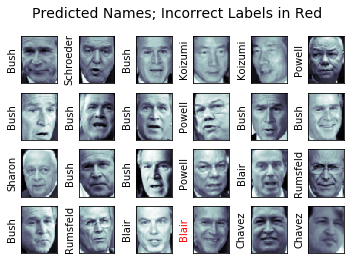

In [27]:
fig, ax = plt.subplots(4, 6)
for i, axi in enumerate(ax.flat):
    axi.imshow(Xtest[i].reshape(62, 47), cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(faces.target_names[y_pred[i]].split()[-1],
                   color='black' if y_pred[i] == ytest[i] else 'red')
fig.suptitle('Predicted Names; Incorrect Labels in Red', size=14);

최종 모델의 성능을 확인하기 위해 confusion matrix를 통해서 어느정도의 정확도가 도출되었는지 확인한다.

E:\SW\anaconda3\lib\site-packages\seaborn\matrix.py:143: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if xticklabels == []:
E:\SW\anaconda3\lib\site-packages\seaborn\matrix.py:151: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if yticklabels == []:


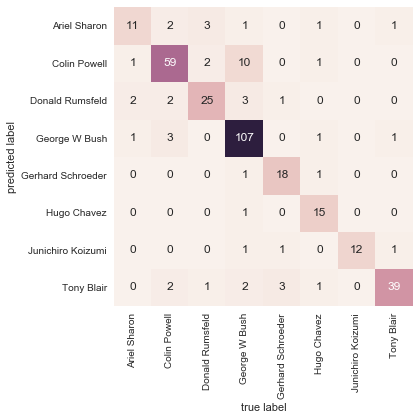

In [29]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
mat = confusion_matrix(ytest, y_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=faces.target_names,
            yticklabels=faces.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');